### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "xing_oct_scan_round_150_1500"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                      
lhcb1 -300.0   -300.0   5.0 5.0 62.315 60.32 1.400000e+11            0.000003  0.000003  120.0               base_collider   
                                                                                         130.0               base_collider   
                                                                                         140.0               base_collider   
                                                                                         150.0               base_collider   
                                                                                         160.0               base_collider   
...                                                                                                                    ...   
       300.0    300.0   5.0 5.0 62.315 60.32 1.400000e+11            0.000003  0.000003  230.0               base_collider   
                                                                                         240.0               base_collider   
                                                                                         250.0               base_collider   
                                                                                         260.0               base_collider   
                                                                                         270.0               base_collider   

                                                                                                         normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                                     
lhcb1 -300.0   -300.0   5.0 5.0 62.315 60.32 1.400000e+11            0.000003  0.000003  120.0                                      2.414   
                                                                                         130.0                                      2.552   
                                                                                         140.0                                      2.897   
                                                                                         150.0                                      3.517   
                                                                                         160.0                                      4.276   
...                                                                                                                                   ...   
       300.0    300.0   5.0 5.0 62.315 60.32 1.400000e+11            0.000003  0.000003  230.0                                      5.103   
                                                                                         240.0                                      5.034   
                                                                                         250.0                                      5.172   
                                                                                         260.0                                      5.103   
                                                                                         270.0                                      5.241   

                                                                                                             qx  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle           
lhcb1 -300.0   -300.0   5.0 5.0 62.315 60.32 1.400000e+11            0.000003  0.000003  120.0           62.315   
                                                                                         130.0           62.315   
                                                                                         140.0           62.315   
                                                        

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="i_oct_b1", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
i_oct_b1,,,,,,,,,,,,,,,,
-300.0,2.414,2.552,2.897,3.517,4.276,4.759,4.690,4.828,4.690,4.759,4.828,5.034,5.862,5.517,6.000,5.448
-260.0,2.414,2.690,2.897,3.724,3.862,4.483,4.621,4.621,4.690,5.103,5.172,4.828,5.379,5.724,6.000,6.345
-220.0,2.276,2.621,2.966,3.379,4.207,4.621,4.759,4.759,4.897,4.690,4.828,4.897,5.310,5.586,5.586,5.586
-180.0,2.552,2.690,2.897,3.655,4.345,4.483,4.897,4.828,5.034,4.690,5.034,5.379,5.241,5.310,5.172,5.448
-140.0,2.552,2.828,3.310,3.517,4.276,4.414,4.552,5.034,4.897,5.379,5.034,5.172,5.103,4.966,5.172,4.621
-100.0,2.276,2.897,3.310,3.586,4.276,4.552,4.759,4.828,5.034,5.517,5.931,6.000,5.379,6.345,6.690,7.103
-60.0,2.345,2.690,3.379,3.862,4.345,4.483,4.966,4.897,5.379,5.793,6.276,6.483,6.483,6.690,7.034,6.966
-20.0,2.276,2.621,3.034,3.586,4.345,4.828,5.172,4.759,5.655,6.138,5.931,6.897,6.759,6.828,6.966,6.414
20.0,2.345,2.690,3.379,3.793,4.414,4.552,4.966,5.172,5.724,6.276,6.345,6.759,6.759,6.690,6.690,6.828


In [4]:
array_xing = np.linspace(120, 270, 16, endpoint=True)
df_to_plot.columns = [str(xing) for xing in array_xing]

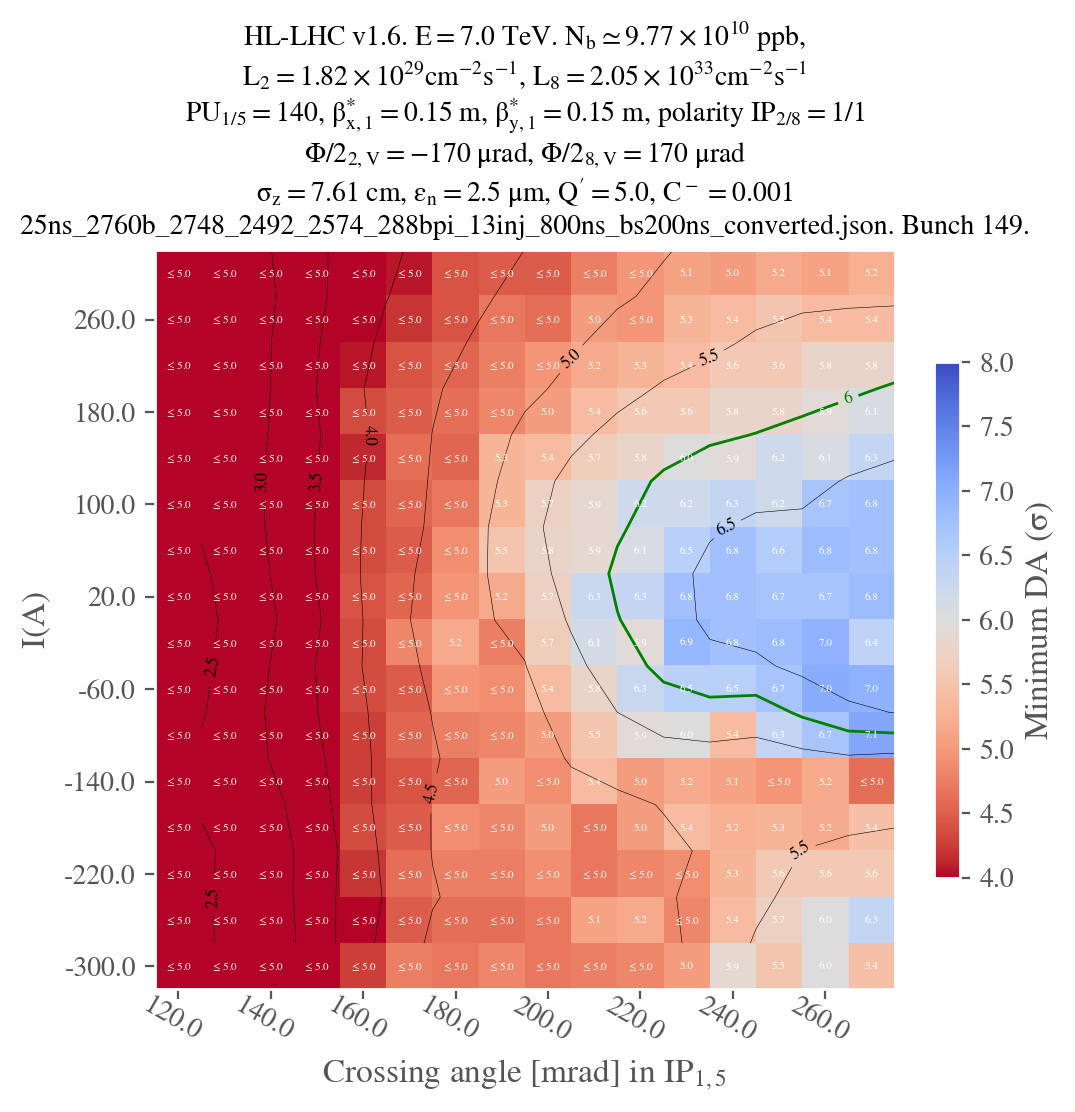

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=True,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=6.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    display_xing = False,
    vmin=4.,
    vmax=8.0,
    CC = False,
    ignore_lumi_1_5 = True,
    xlabel = r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel = r"$I(A)$",
)
# ! Verified
